***
# <font color='royalblue'>Image Segmentation via Kruskal's Algorithm</font>
## <font color='royalblue'>Instruction</font>


### **Aims**: 
In this last assignment, we aim to study **kruskal's algorithm** and **minimum spanning trees**. We will see how a simple digital image can be segmented: nearby similar pixels will be merged into a single color.


### **Outcomes**:
- Part 1: Construct a 2D array into a graph and implement relevant operations. This focuses on small examples.
- Part 2: Apply Part 1 functions on real images.



Extra:
- `prague_square_256.png`, `rabbit.png`, `pot.png`: The images to be used for Part 2.
- `assignment4.html`: The `html` output of the provided `assignment4.ipynb`. This is just for your reference if you want to see output examples. Don't turn this in.
- Other `.png` and `.gif` files are for visualizing the instruction.


### **Functions to implement**:
1. Part 1: You will implement the following missing functions in `mst.py`. 
    - `image_to_graph`
    - `segment_kruskal`


2. Part 2: No functions to implement. Part 2 uses the functions from Part 1.


### **Points**: 50 pts total
Correctness of the following functions in `mst.py`:

1. **20 pts**: `image_to_graph`
2. **30 pts**: `segment_kruskal`

    
### **What to Submit**:
- `assignment4.ipynb` with (1) your name and ID at the top cell
- `mst.py` with (1) your name and ID at the top comment block and (2) your implementations.

Nothing else.

### **File Names**:

Please follow the simple naming comventions to help us with the autograding:

1. <font color='red'>**Please, please, please**</font> submit your files with the specified filenames:
    - `assignment4.ipynb` 
    - `mst.py`

2. No extra information in your filename.
    - no `assignment4(1).ipynb` or `mst(1).py`
    - no names
    - no YIDs

3. Also, please do **not** upload `.zip` files. Points will be taken off for submitting `.zip` files.

**IF YOU FAIL TO MEET THESE CRITERIA, YOU GET 0 POINTS FOR THIS ASSIGNMENT**.

### **Notes** (similar to HW3 and HW2 Notes):
1. Only `mst.py` will be tested and graded. My own `assignment4_test.ipynb` script will test your `mst.py`, but the test script will not be too different from this `assignment4.ipynb`. Meaning, if your implementations work well on `assignment4.ipynb`, you can expect them to work similarly well on my `assignment4_test.ipynb`.
2. You are welcome to slightly modify `assignment4.ipynb` for your convenience for testing and such, but again, the grading will be based on my own jupyter notebook to test your `mst.py`.
3. For additional information about this HW, see the instruction video uploaded on 11/30.
4. The additional Python packages used in HW3 will be used again.
5. Despite the long code, what you have to implement is pretty short. Spend a good amount of time to understand `mst.py`. Your actual implementation will be easier.


***
## <font color='royalblue'>Part 1: Implement all functions and test on a small 2d image</font>
In Part 1, we implement and test each function one by one. Two functions in `mst.py` have to be implemented:

#### <font color='red'>**[Functions to implement]**</font>
- `image_to_graph`
- `segment_kruskal`


First, run the code below so you don't have to reload the kernel everytime you want to run from scratch:

In [ ]:
%load_ext autoreload 
%autoreload 2

***



### <font color='royalblue'>2. `Graph` Class</font>
This is the simple undirected weighted graph implementation. Pretty much identical to the ordinary graph we learned, except for the `Vertex` object:

- The `Vertex` class holds 3 variables. Each pixel of an image constructs a vertex:
    1. _color: value of the 2D array (single or RGB values)
    2. _i, _j: i and j coordinates of the 2D array entry which this Vertex object holds
    
    
### <font color='royalblue'>3. Kruskal's Algorithm</font>
`mst.py` has the vanilla Kruskal's algorithm straight from the textbook: `mst_kruskal`. We don't directly use this function. Instead, this is provided for you to modify and complete `segment_kruskal` function. Detailed comments are in the code. You can closely follow `mst_kruskal`. It is useful to directly copy/paste lines from `mst_kruskal` into your `segment_kruskal`. Again, this is completely fine for HW4 since this HW's goal is to modify this existing `mst_kruskal` and turn it into `segment_kruskal`.


***
## <font color='royalblue'>Part 1A: Graph from Image</font>
#### <font color='red'>**[Functions to implement]**</font>
- `image_to_graph`

Recall how we turned a 2D image into a 2D doubly linked list in HW 2. This is even easier: we construct a `Graph` object with vertices and edges such that it holds
1. Vertices where each `Vertex` is from image `I` with `color = I[i,j]` and its location `i` and `j`
2. Edges which connects two Vertex objects `u` and `v` which are from two adjacent pixels in `I`. The edge weight is computed using `compute_weight(u,v)`.

'Adjacent pixels' are two pixels that are right next to each other (left, right, top, bottom). Not diagonally though. Meaning, the four adjacent pixels of `I[i,j]` are `I[i-1,j]`, `I[i+1,j]`, `I[i,j-1]`, and `I[i,j+1]`.

Below is an image where the vertices and edges are visualized on top of a simple 4 x 4 image:
<div>
<img src="figures/image_graph.png" width="500"/>
</div>

`image_to_graph` is going to do exactly this.

**Implement `image_to_graph` and see if you can produce similar figures (with edge weights!).** Since random noises are added to the images, your image colors may not look *exactly* the same as mine, but that's okay.

Check if your edge weights make sense. Is it large when it connects two pixels with different colors? Is it small when it connects pixels with similar colors?

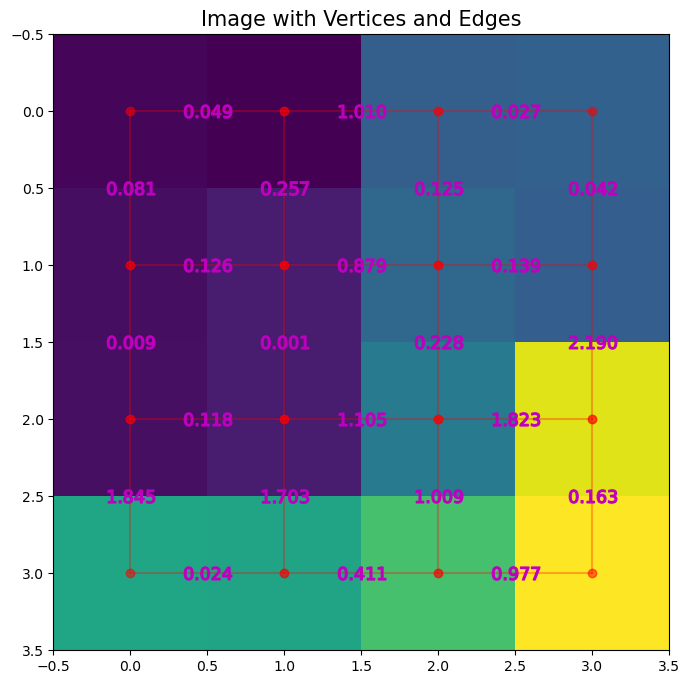

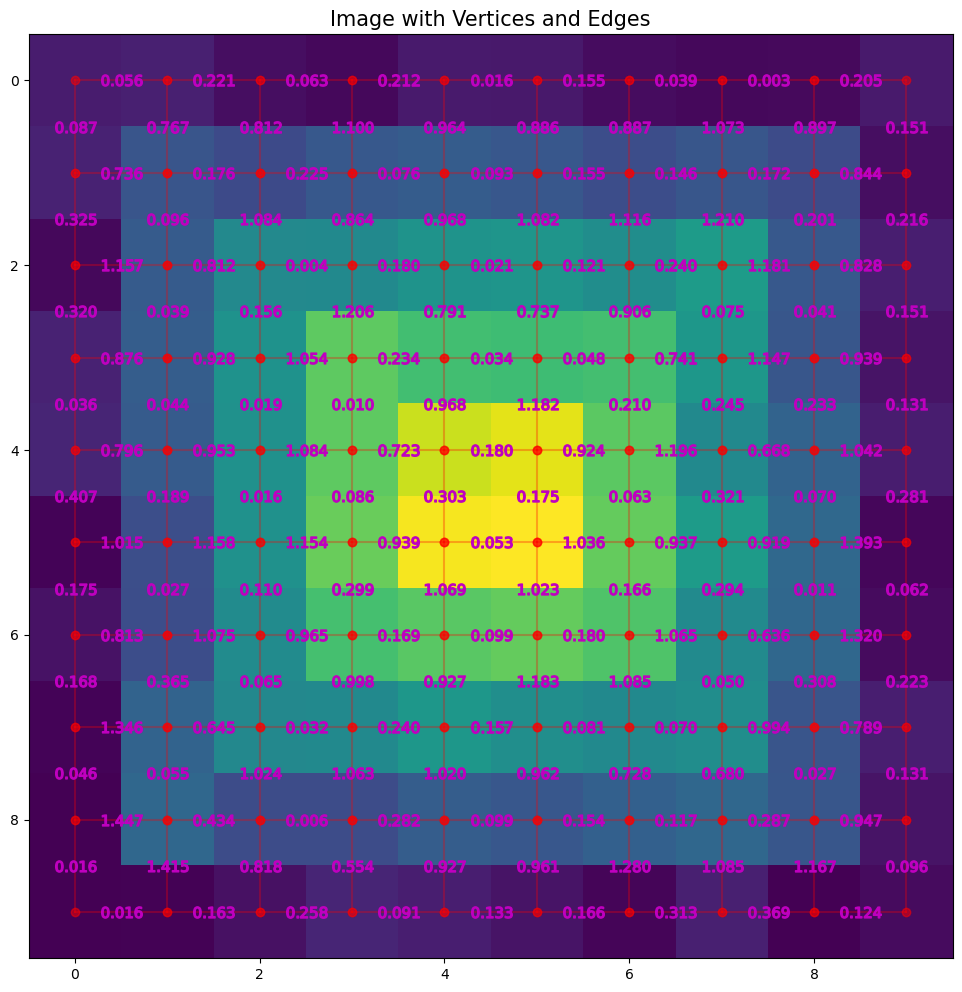

'2025-06-04 20:12:26'

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mst import *

# Image 1
I = np.array([[1, 1, 2, 2],
              [1, 1, 2, 2],
              [1, 1, 2, 4],
              [3, 3, 3, 4]], dtype=float)
I_noise = 0.5*np.random.rand(I.shape[0], I.shape[1])
I += I_noise

G = image_to_graph(I)

plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(I)
for edge in G.edges():
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.3, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Image with Vertices and Edges', fontdict = {'fontsize' : 15})
plt.show()

# Image 2
N = 10
I = np.ones((N,N))
for i in range(I.shape[0]//2):
    I[i:I.shape[0]-i, i:I.shape[1]-i] = i
I_noise = 0.5*np.random.rand(I.shape[0], I.shape[1])
I += I_noise

G = image_to_graph(I)

plt.rcParams['figure.figsize'] = [12, 12]
plt.imshow(I)
for edge in G.edges():
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.3, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=30, color='m')
plt.title('Image with Vertices and Edges', fontdict = {'fontsize' : 15})
plt.show()

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

***
## <font color='royalblue'>Part 1B: Segmentation via Kruskal's Algorithm</font>
#### <font color='red'>**[Functions to implement]**</font>
- `segment_kruskal`

Time to segment the image. In other words, perform the Kruskal's algorithm on `G` from `image_to_graph` function from Part A. If we simply perform the vanilla Kruskal/s algorithm, we end up with a single MST. Below is an animation showing how the edges are added until there is a single MST:

<img src="figures/kruskal.gif" width="400"/>


For **segmentation**, we stop before we merge all the clusters. If we want to return `num_seg` number of segments, it means we perform the Kruskal's algorithm until `forest` has `num_seg` number of trees.

This function returns two outputs:
1. `segmentation`: 2D array where each entry holds the color of the cluster leader (root Vertex).
2. `spanning_forest`: This is identical to `tree` in `mst_kruskal` function, except this holds the edges for multiple MSTs which form our spanning forest.

Below, we see an example:
1. Image with Graph and its weights.

<img src="figures/image1_graph.png" width="400"/>

2. Image with the spanning forest. `num_seg = 4`. Do you see 4 MSTs?

<img src="figures/image1_forest.png" width="400"/>

3. Segmented image with the spanning forest. For each MST, its pixels have the same color.

<img src="figures/image1_segmented.png" width="400"/>



See another example with `num_seg = 5`:
1. Image with Graph and its weights.

<img src="figures/image2_graph.png" width="600"/>

2. Image with the spanning forest. `num_seg = 5`. Do you see 5 MSTs?

<img src="figures/image2_forest.png" width="600"/>

3. Segmented image with the spanning forest. For each MST, its pixels have the same color.

<img src="figures/image2_segmented.png" width="600"/>

#### <font color='royalblue'>**Run this yourself: Image 0**</font>
This "image" was randomly generated and is hard-coded for testing purpose. This is the only case where you can compare with your example. Image 1 and Image 2 are randomly generated each time you run, so pass Image 0 before you check Image 1 and Image 2.

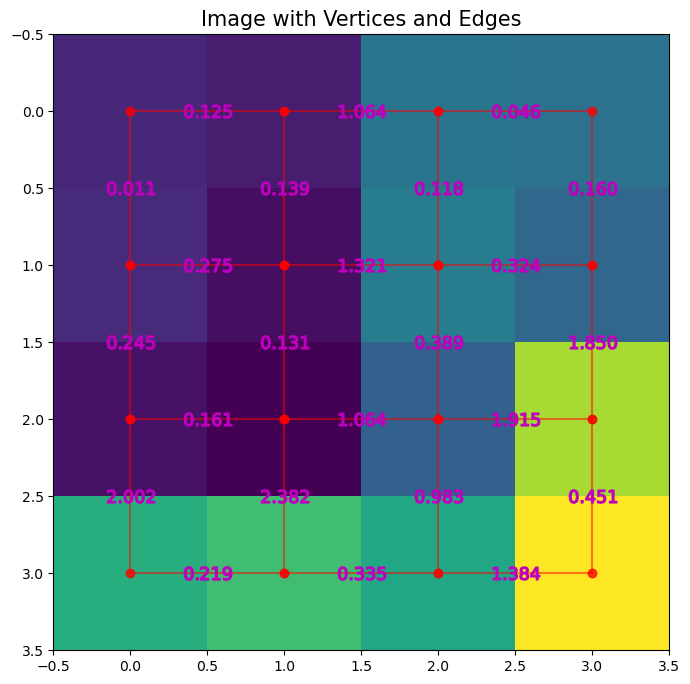

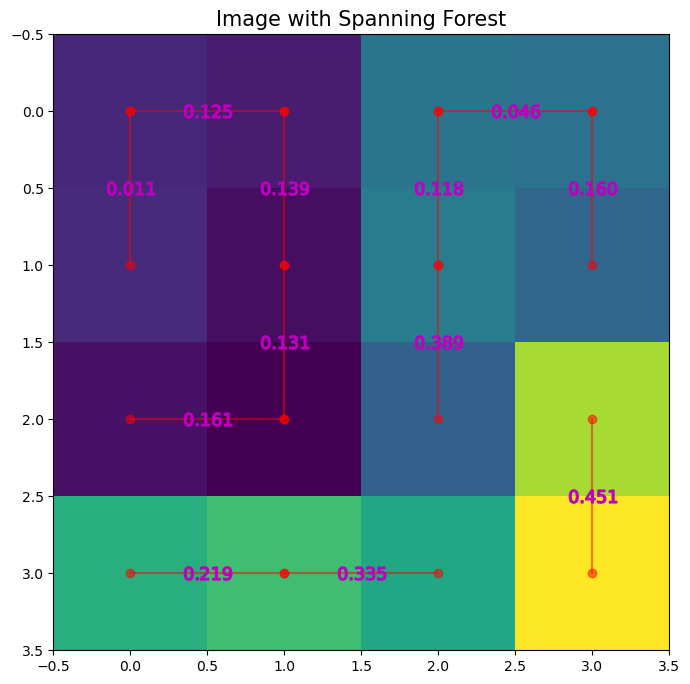

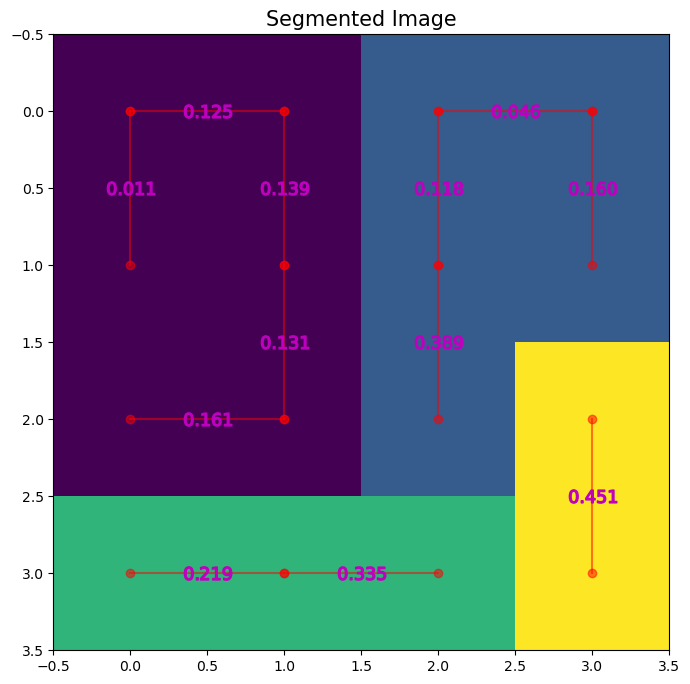

'2025-06-04 20:12:35'

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mst import *
    
I = np.array([[1.4219898, 1.2974467, 2.3618485, 2.3160265],
              [1.4332285, 1.1586564, 2.4799264, 2.1557857],
              [1.1881496, 1.0272779, 2.0910218, 4.0062612],
              [3.1898542, 3.4089821, 3.0737244, 4.4572755]], dtype=float)

plt.rcParams['figure.figsize'] = [8, 8]

# 1. Image with Graph
G = image_to_graph(I)
plt.imshow(I)
for edge in G.edges():
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Image with Vertices and Edges', fontdict = {'fontsize' : 15})
plt.show()

# 2. Image with Spanning Forest
num_seg = 4
T, spanning_forest= segment_kruskal(I, num_seg)

plt.imshow(I)
for i in range(len(spanning_forest)):
    edge = spanning_forest[i]
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Image with Spanning Forest', fontdict = {'fontsize' : 15})
plt.show()

# 3. Segmented Image
plt.imshow(T)
for i in range(len(spanning_forest)):
    edge = spanning_forest[i]
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Segmented Image', fontdict = {'fontsize' : 15})
plt.show()

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

#### <font color='royalblue'>**Run this yourself: Image 1**</font>
1. Visually check if the graphs make sense
2. Visually check if the spanning forest makes sense
3. Visually check if the segmented images make sense

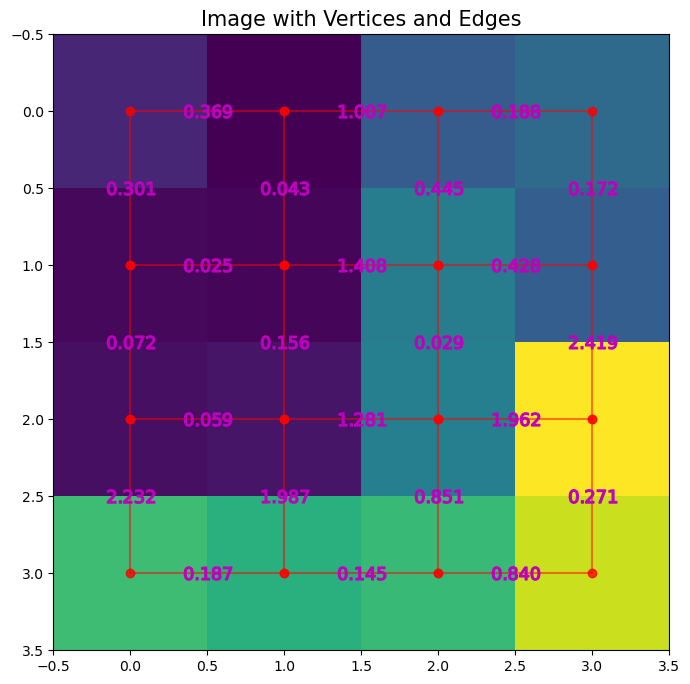

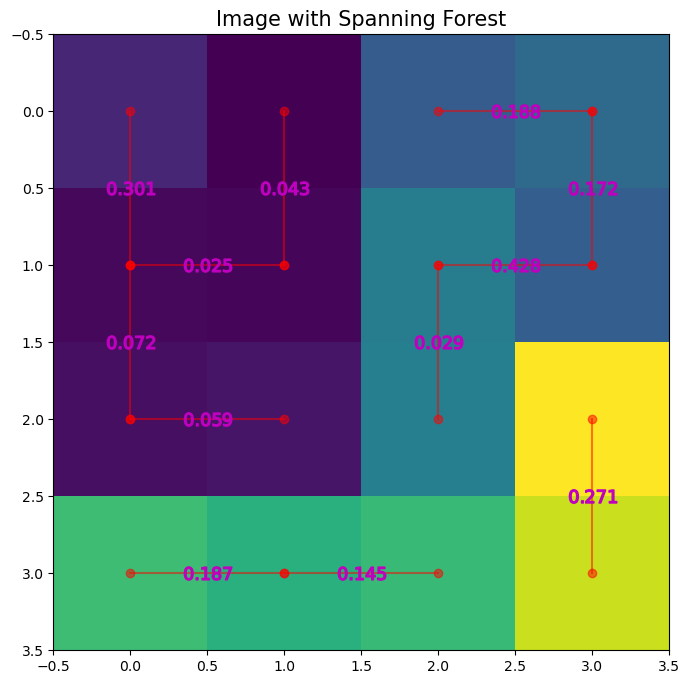

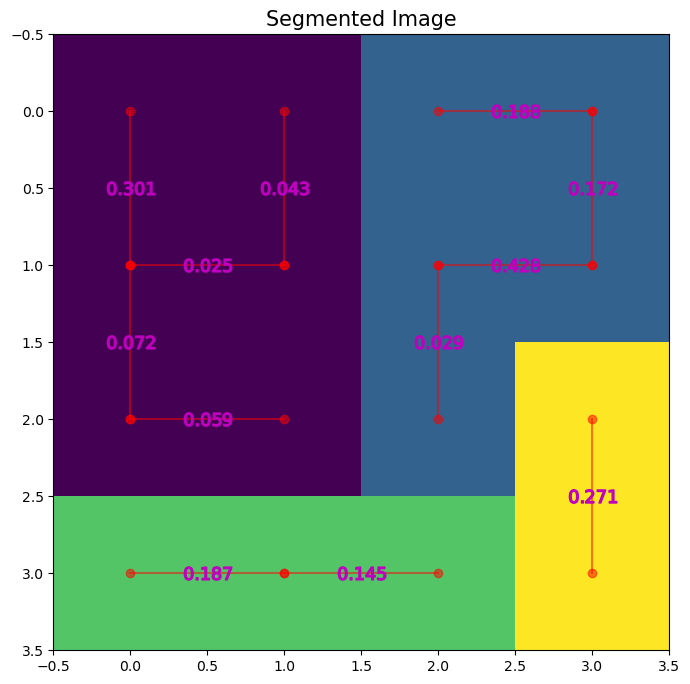

'2025-06-04 20:12:49'

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mst import *
    
I = np.array([[1, 1, 2, 2],
              [1, 1, 2, 2],
              [1, 1, 2, 4],
              [3, 3, 3, 4]], dtype=float)
I_noise = 0.5*np.random.rand(I.shape[0], I.shape[1])
I += I_noise

plt.rcParams['figure.figsize'] = [8, 8]

# 1. Image with Graph
G = image_to_graph(I)
plt.imshow(I)
for edge in G.edges():
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Image with Vertices and Edges', fontdict = {'fontsize' : 15})
plt.show()

# 2. Image with Spanning Forest
num_seg = 4
T, spanning_forest= segment_kruskal(I, num_seg)

plt.imshow(I)
for i in range(len(spanning_forest)):
    edge = spanning_forest[i]
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Image with Spanning Forest', fontdict = {'fontsize' : 15})
plt.show()

# 3. Segmented Image
plt.imshow(T)
for i in range(len(spanning_forest)):
    edge = spanning_forest[i]
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Segmented Image', fontdict = {'fontsize' : 15})
plt.show()

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

#### <font color='royalblue'>**Run this yourself: Image 2**</font>
1. Visually check if the graphs make sense
2. Visually check if the spanning forest makes sense
3. Visually check if the segmented images make sense

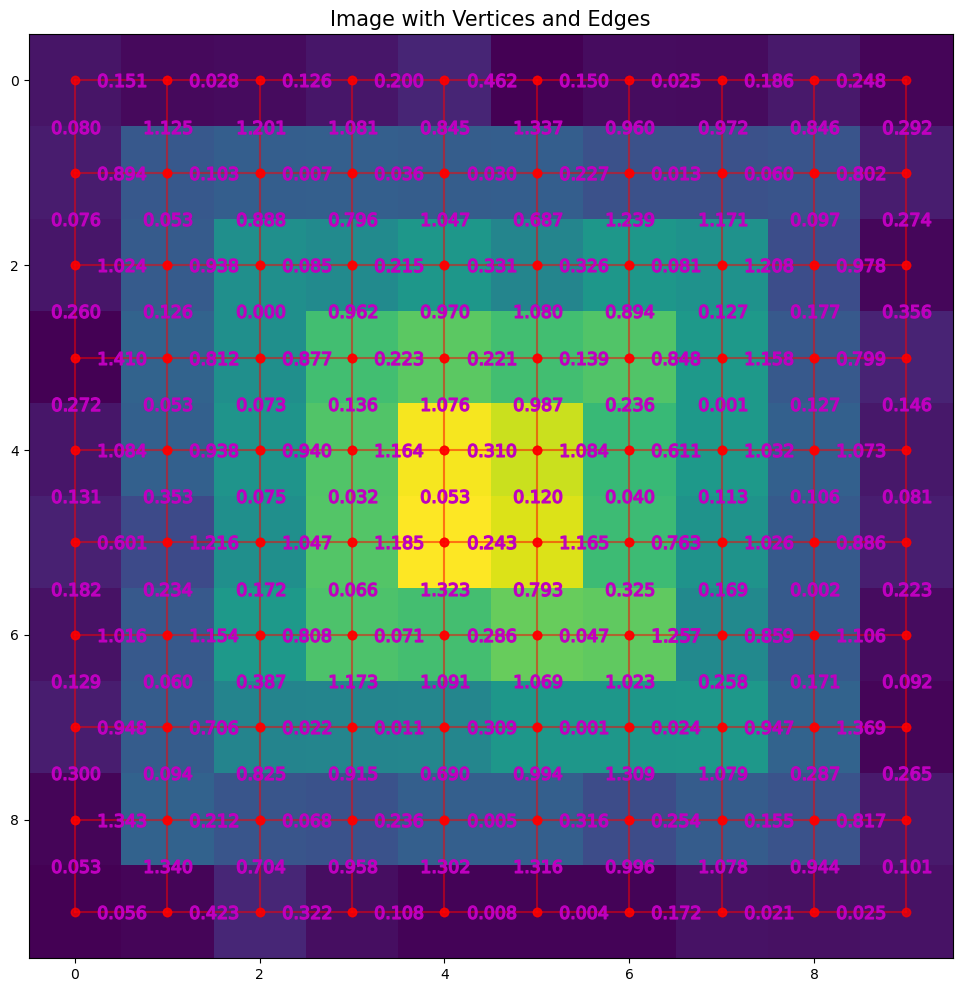

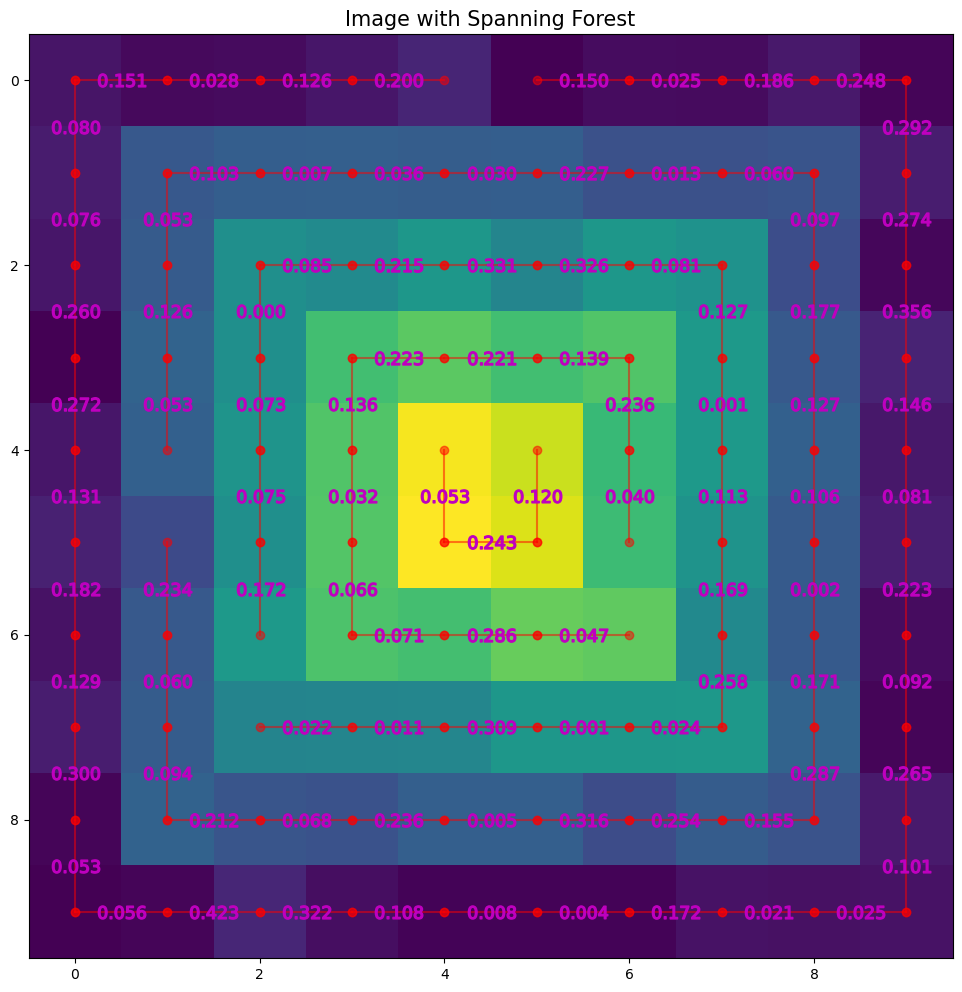

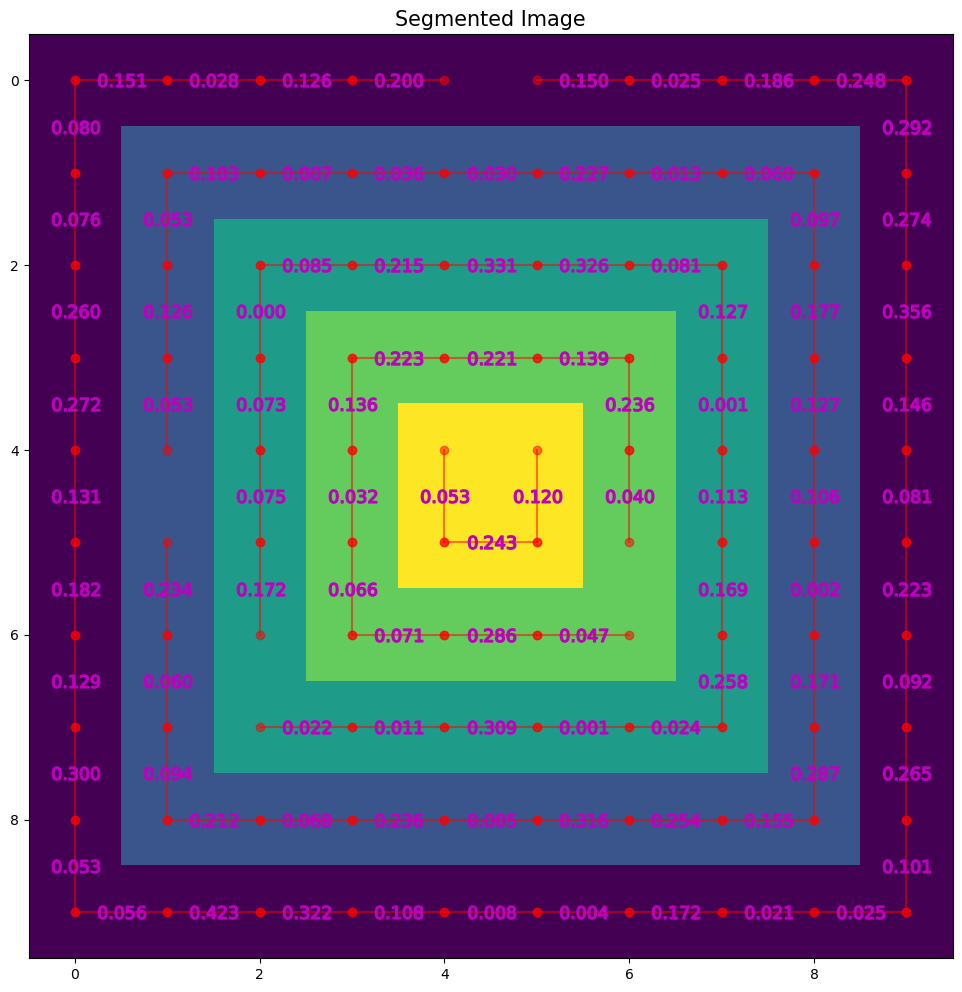

'2025-06-04 20:13:09'

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mst import *

N = 10
I = np.ones((N,N))
for i in range(I.shape[0]//2):
    I[i:I.shape[0]-i, i:I.shape[1]-i] = i
I_noise = 0.5*np.random.rand(I.shape[0], I.shape[1])
I += I_noise

plt.rcParams['figure.figsize'] = [12, 12]

# 1. Image with Graph
G = image_to_graph(I)
plt.imshow(I)
for edge in G.edges():
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Image with Vertices and Edges', fontdict = {'fontsize' : 15})
plt.show()

# 2. Image with Spanning Forest
num_seg = 5
T, spanning_forest= segment_kruskal(I, num_seg)

plt.imshow(I)
for i in range(len(spanning_forest)):
    edge = spanning_forest[i]
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Image with Spanning Forest', fontdict = {'fontsize' : 15})
plt.show()

# 3. Segmented Image
plt.imshow(T)
for i in range(len(spanning_forest)):
    edge = spanning_forest[i]
    x0, y0 = edge._u._j, edge._u._i
    x1, y1 = edge._v._j, edge._v._i
    plt.plot([x0, x1], [y0, y1], alpha=0.5, color='r', marker = 'o')
    plt.plot( [(x0+x1)/2], [(y0+y1)/2], alpha=1, marker="${:1.3f}$".format(edge._weight), markersize=35, color='m')
plt.title('Segmented Image', fontdict = {'fontsize' : 15})
plt.show()

from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

#### Comments:
1. Feel free to play around with `num_seg` and see if that changes the number of segmentations (MSTs).

***
## <font color='royalblue'>Part 2: Test on a real image</font>
#### <font color='red'>**[Functions to implement]**</font>
- None. You do not need to implement new functions.

In Part 2, **you simply test your functions on real images**. The key is that Part 1 assumes that color is a single value, while Part 2 deals with (red, green blue) values, so your codes from Part 1 must also work on real images in Part 2. In general, this should not require extra work.

*Note: It is not a good idea to try to show the vertice and edges since these images have high resolutions. Let's just see the images.

Below shows the segmentation results of `prague_square_256.png` with varying number of clusters.
<img src="figures/prague_gif.gif" width="600"/>

Considering how 256 x 256= 65536 is the total number of pixels, the image constructed with 29000 clusters looks pretty good.

Three images (all of size 256 by 256) are tested:
1. `prague_square_256.png`
2. `rabbit.png`
3. `pot.png`

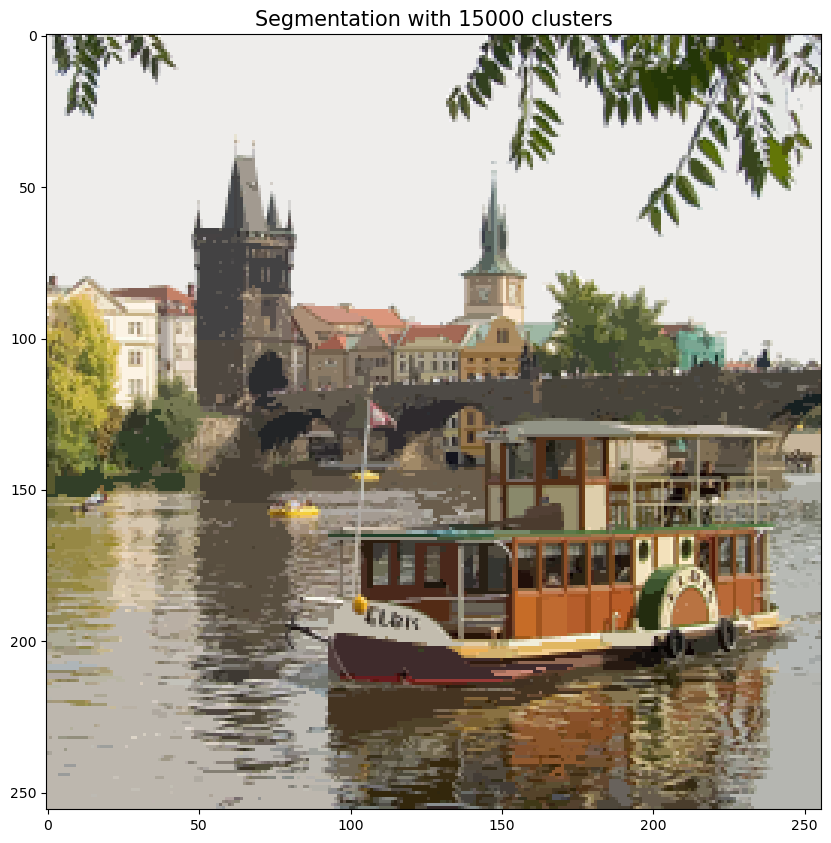

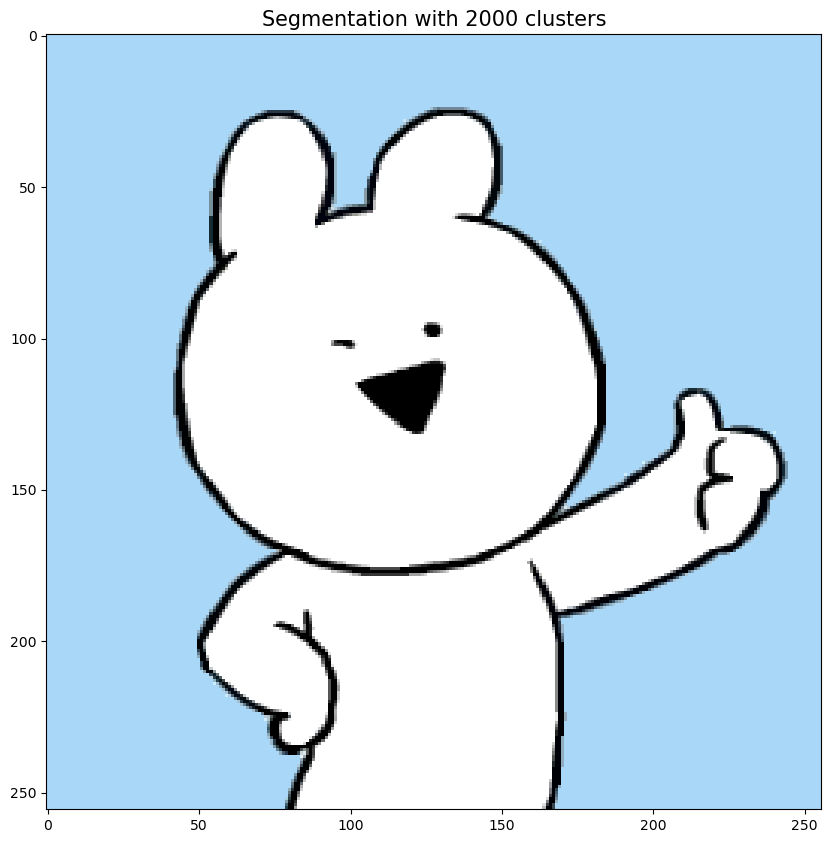

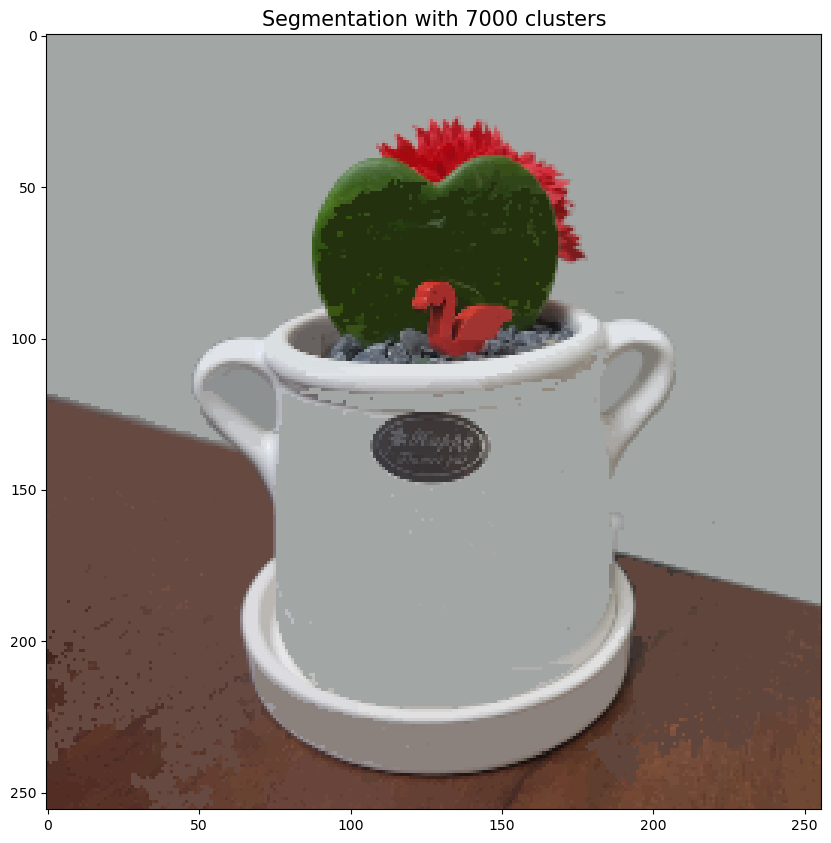

'2025-06-04 20:23:11'

In [ ]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mst import *
from datetime import datetime

plt.rcParams['figure.figsize'] = [10, 13]

# 1. prague example
I = mpimg.imread("prague_square_256.png")

num_seg = 15000
T, spanning_forest= segment_kruskal(I, num_seg)
plt.imshow(T)
plt.title('Segmentation with ' + str(num_seg) + ' clusters', fontdict = {'fontsize' : 15})
plt.show()

datetime.now().strftime('%Y-%m-%d %H:%M:%S')


# 2. Overaction Rabbit example
I = mpimg.imread("rabbit.png")
num_seg = 2000
T, spanning_forest= segment_kruskal(I, num_seg)
plt.imshow(T)
plt.title('Segmentation with ' + str(num_seg) + ' clusters', fontdict = {'fontsize' : 15})
plt.show()

datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# 3. pot example
I = mpimg.imread("pot.png")
num_seg = 7000
T, spanning_forest= segment_kruskal(I, num_seg)
plt.imshow(T)
plt.title('Segmentation with ' + str(num_seg) + ' clusters', fontdict = {'fontsize' : 15})
plt.show()

datetime.now().strftime('%Y-%m-%d %H:%M:%S')